#**Road Accident Analysis**

#**Problem Statement**

Road accidents are a big problem worldwide. They lead to injuries, loss of lives, and financial costs.
By studying accident data, we can help traffic managers and city planners understand how to reduce these accidents.

This project aims to analyze accident data to find answers to important questions like:

When and where do most accidents happen?

What are the main causes of accidents?

How do age, weather, and road conditions affect accidents?

What types of vehicles and drivers are involved most often?

#**Data Cleaning**

In [42]:
#import libaraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


We started by importing the dataset into Python using the pandas library.

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
df = pd.read_csv('/content/Road.csv')

In [45]:
df.shape

(12316, 32)

In [46]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [47]:
df = df.drop(['Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement'], axis=1, errors='ignore')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [49]:
pd.isnull(df).sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [50]:
df.fillna(method='ffill',inplace=True)


<ipython-input-50-ae2c85fc64fc>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


In [51]:
df.drop_duplicates(inplace=True)

In [52]:
df.nunique()

,0
Time,1074
Day_of_week,7
Age_band_of_driver,5
Sex_of_driver,3
Educational_level,7
Vehicle_driver_relation,4
Driving_experience,7
Type_of_vehicle,17
Owner_of_vehicle,4
Service_year_of_vehicle,6


In [53]:
df.shape

(12316, 28)

#**Data Visualization**

# **Accidents by Day of the Week**
This code creates a count plot to show how accidents are distributed across the days of the week and adds the number of accidents above each bar for better understanding.


<ipython-input-54-504093155570>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Day_of_week',


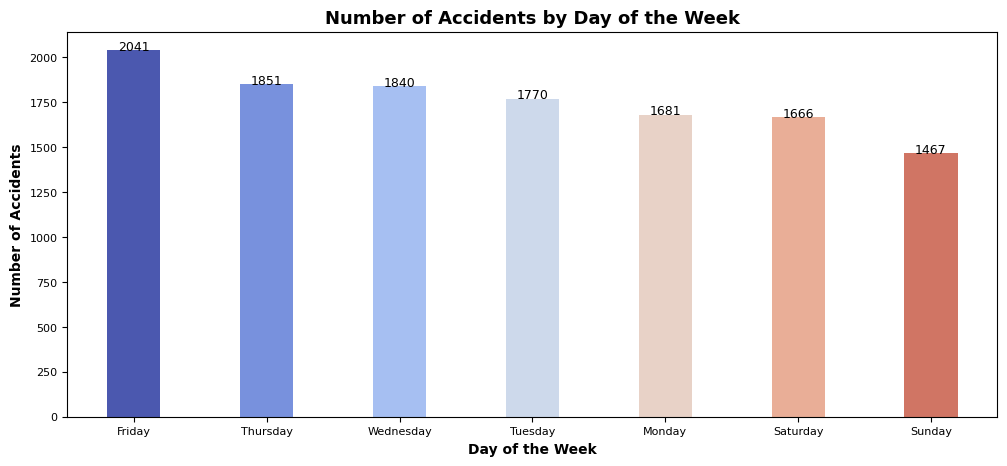

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
colormap = plt.get_cmap("coolwarm")
num_categories = df["Day_of_week"].nunique()
colors = [colormap(i / num_categories) for i in range(num_categories)]
sns.countplot(data=df, x='Day_of_week',
              order=df['Day_of_week'].value_counts().index,
              palette=colors, width=0.4)
for i, v in enumerate(df['Day_of_week'].value_counts()):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=9)
plt.title('Number of Accidents by Day of the Week', fontweight='bold', fontsize=13)
plt.xlabel('Day of the Week', fontweight='bold', fontsize=10)
plt.ylabel('Number of Accidents', fontweight='bold', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()


#**Accidents by Time of Day**
This code creates a line graph showing accidents by hour, and also shades the area under the line for better clarity.








<ipython-input-55-44c073c9b128>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour


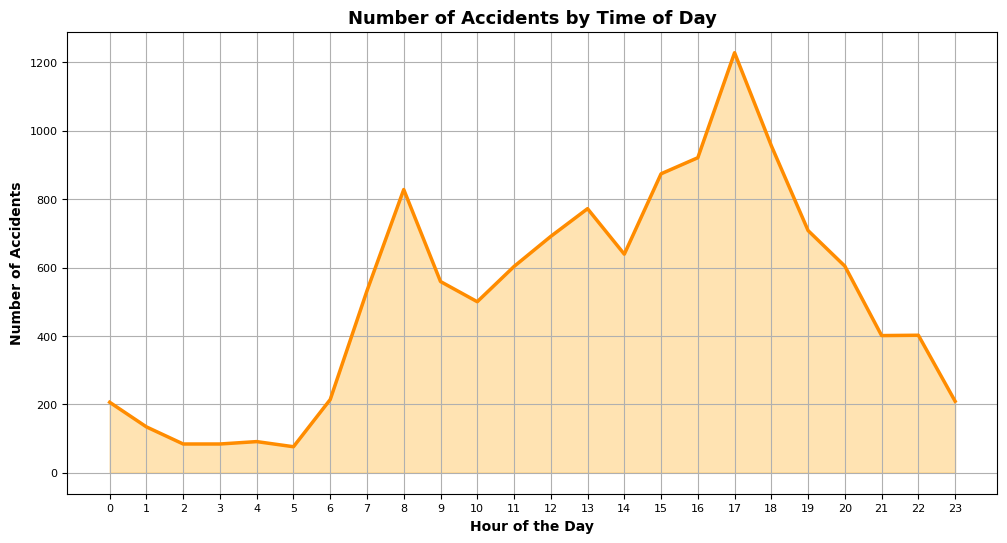

In [55]:
df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour
hourly_counts = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, linewidth=2.5, color="darkorange")
plt.fill_between(hourly_counts.index, hourly_counts.values, color="orange", alpha=0.3)
plt.title('Number of Accidents by Time of Day', fontsize=13, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=10, fontweight='bold')
plt.ylabel('Number of Accidents', fontsize=10, fontweight='bold')
plt.xticks(range(0, 24), fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True)
plt.show()


#**Accident Severity Distribution**
The pie chart shows how many accidents happened at different levels of severity, like minor, serious, or fatal injuries.

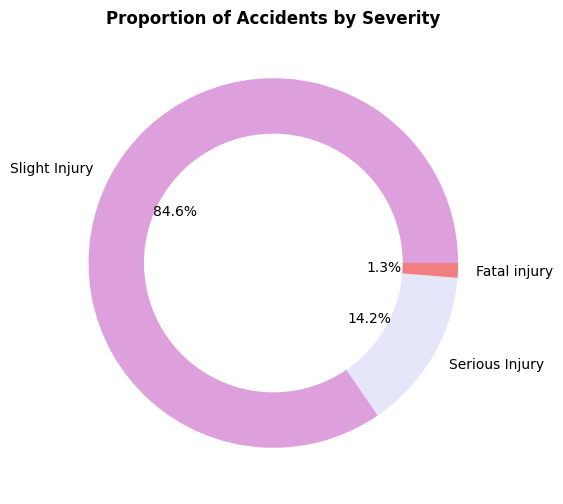

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
achromatic_colors = ['plum', 'lavender', 'lightcoral', '#505050']
plt.figure(figsize=(6, 6))
df['Accident_severity'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=achromatic_colors,  # Using the achromatic color codes
    title='Proportion of Accidents by Severity',  # Add title directly
    wedgeprops=dict(width=0.3)  # Creates the donut effect
)
plt.title('Proportion of Accidents by Severity', fontsize=12, fontweight='bold')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()


#**Top 10 Causes of Accidents**
This code makes a pie chart showing accident causes like overtaking, wrong turns, and careless driving and shows that most accidents happen due to careless driving, lane changes, and not keeping a safe distance.

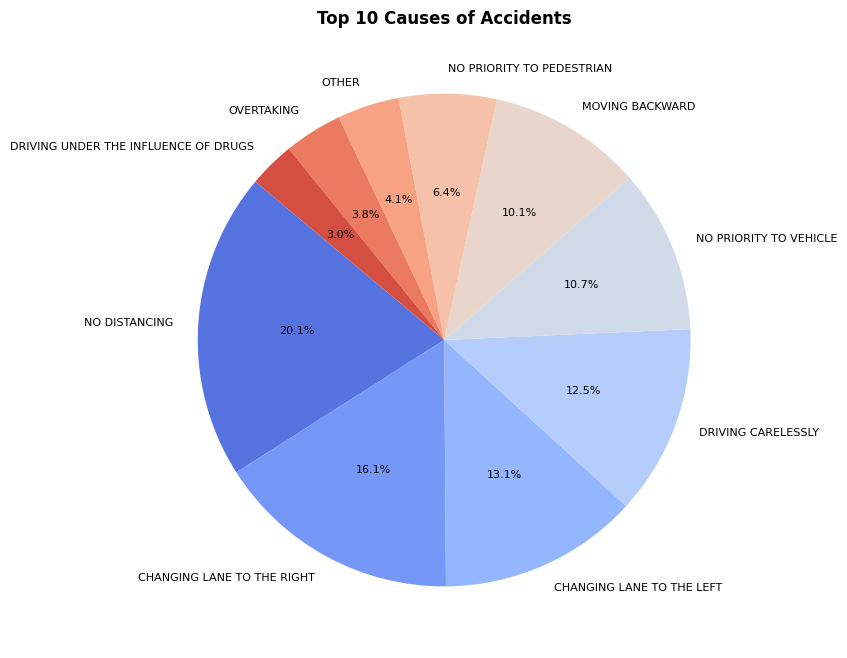

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
top_causes = df['Cause_of_accident'].value_counts().head(10)
plt.figure(figsize=(8, 8))  # Kept the figure size compact
colors = sns.color_palette("coolwarm", len(top_causes))
plt.pie(
    top_causes,
    labels=[label.upper() for label in top_causes.index],  # Bold labels (uppercase for emphasis)
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 8, 'color': 'black'}  # Bold text props
)
plt.title('Top 10 Causes of Accidents', fontsize=12, fontweight='bold')
plt.show()



#**Accidents by Driver Age Group**
This code creates a bar chart showing how many accidents happened in different driver age groups. It helps to identify which age groups are involved in the most accidents.

<ipython-input-58-ab0c89105236>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


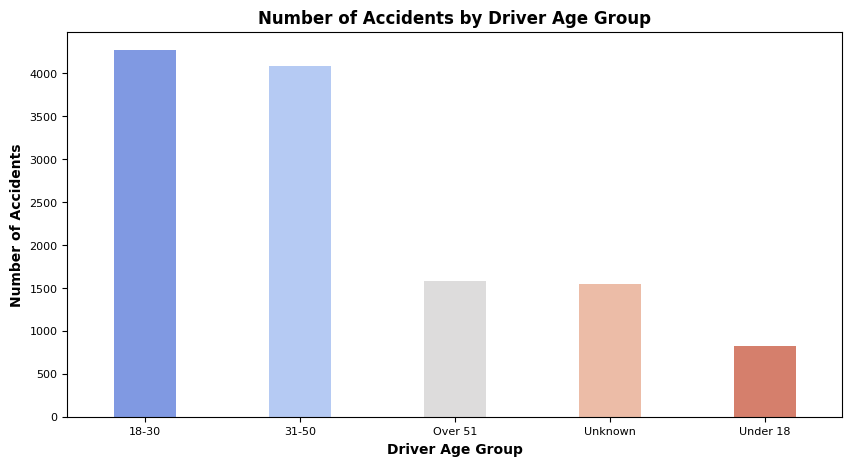

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
colors = sns.color_palette("coolwarm", len(df['Age_band_of_driver'].unique()))
sns.countplot(
    data=df,
    x='Age_band_of_driver',
    order=df['Age_band_of_driver'].value_counts().index,
    palette=colors,
    width=0.4
)
plt.title('Number of Accidents by Driver Age Group', fontsize=12, fontweight='bold')
plt.xlabel('Driver Age Group', fontsize=10, fontweight='bold')
plt.ylabel('Number of Accidents', fontsize=10, fontweight='bold')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()



#**Accidents by Vehicle Type**
This code creates a horizontal bar chart showing how many accidents happened with each vehicle type. It helps to see which vehicles are involved in the most accidents.

<ipython-input-59-56e84b06cda6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Type_of_vehicle', order=df['Type_of_vehicle'].value_counts().index, palette=colors)


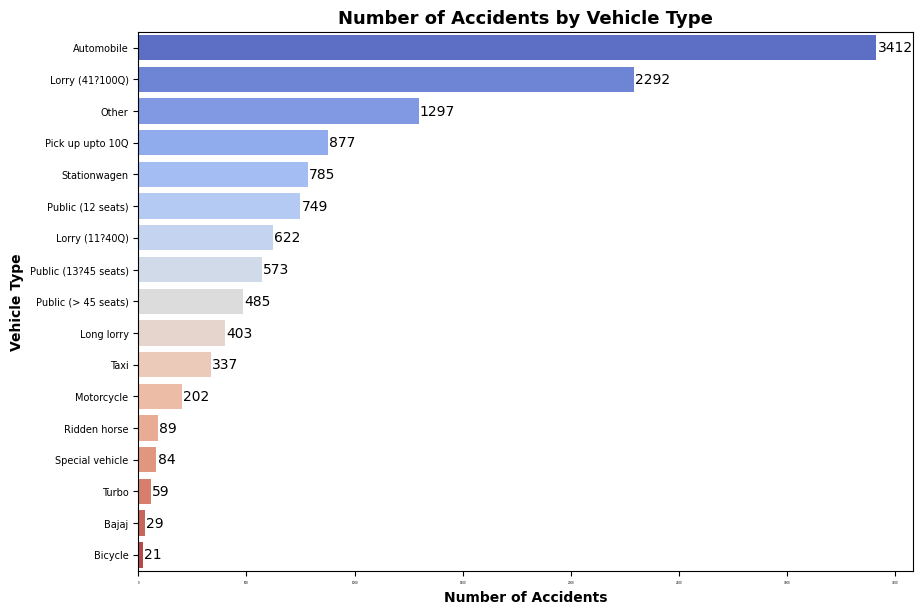

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
colors = sns.color_palette("coolwarm", len(df['Type_of_vehicle'].value_counts()))
sns.countplot(data=df, y='Type_of_vehicle', order=df['Type_of_vehicle'].value_counts().index, palette=colors)
for p in plt.gca().patches:
    plt.gca().text(p.get_width() + 5, p.get_y() + p.get_height()/2, int(p.get_width()), va='center', fontsize=10)
plt.title('Number of Accidents by Vehicle Type', fontsize=13, fontweight='bold')
plt.xlabel('Number of Accidents', fontsize=10, fontweight='bold')
plt.ylabel('Vehicle Type', fontsize=10, fontweight='bold')
plt.xticks(fontsize=2)
plt.yticks(fontsize=7)

plt.show()


#**Effect of Light Conditions on Accidents**
This code makes a stacked bar chart showing how accident severity changes with light condition , and most accidents happen during the day.

<Figure size 500x400 with 0 Axes>

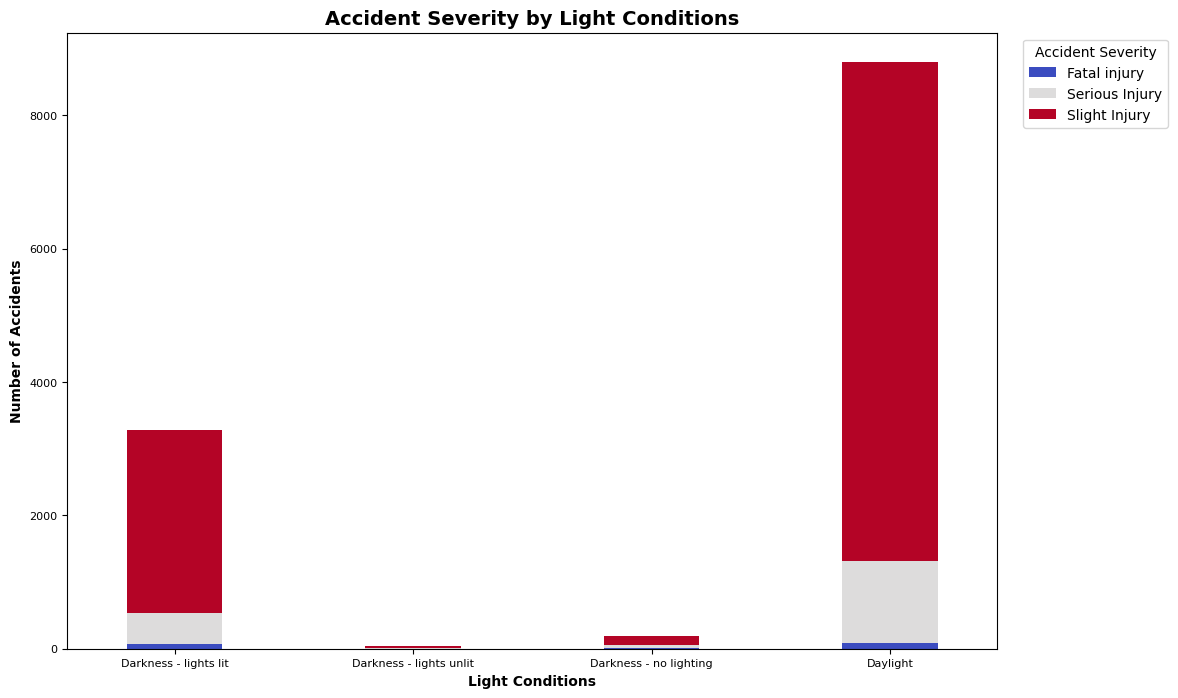

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(5, 4))
pd.crosstab(df['Light_conditions'], df['Accident_severity']).plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 8), width=0.4)
plt.title('Accident Severity by Light Conditions', fontsize=14, fontweight='bold')
plt.xlabel('Light Conditions', fontsize=10, fontweight='bold')
plt.ylabel('Number of Accidents', fontsize=10, fontweight='bold')
plt.legend(title='Accident Severity', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=0, fontsize=8)
plt.yticks(fontsize=8)
plt.show()


#**Accidents by Weather Conditions**
This code generates a bar chart to show how weather conditions affect the number of accidents.

<ipython-input-61-48c6584760cf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.values, y=weather_counts.index, palette='coolwarm')


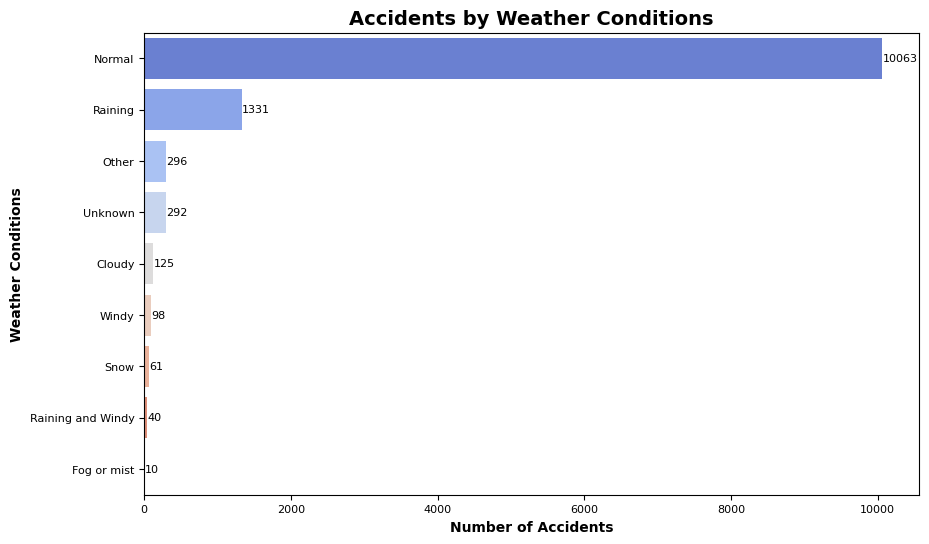

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
weather_counts = df['Weather_conditions'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=weather_counts.values, y=weather_counts.index, palette='coolwarm')
for i, v in enumerate(weather_counts.values):
    plt.text(v + 2, i, str(v), va='center', fontsize=8, color='black')
plt.title('Accidents by Weather Conditions', fontsize=14, fontweight='bold')
plt.xlabel('Number of Accidents', fontsize=10, fontweight='bold')
plt.ylabel('Weather Conditions', fontsize=10, fontweight='bold')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()


#**Road Surface Conditions and Accidents**
This code creates a bar chart to show the number of accidents on different road surfaces, such as wet, dry, or icy, and also show that the highest number of accidents occur on dry roads.


<ipython-input-62-5606a86a9d6b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Road_surface_conditions', palette='coolwarm',width=0.4)


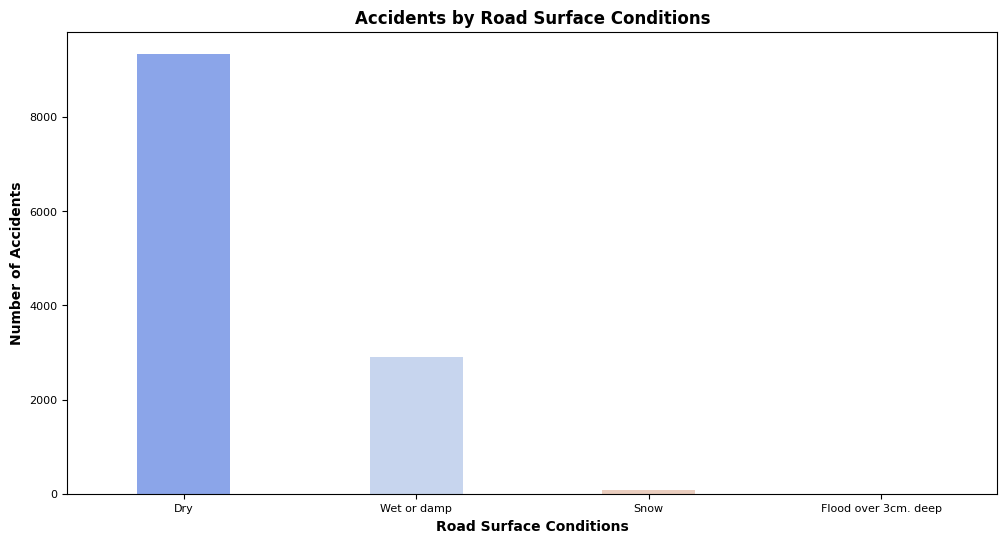

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Road_surface_conditions', palette='coolwarm',width=0.4)
plt.title('Accidents by Road Surface Conditions', fontsize=12, weight='bold')
plt.xlabel('Road Surface Conditions', fontsize=10, weight='bold')
plt.ylabel('Number of Accidents', fontsize=10, weight='bold')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

#**Conclusion**
This project looked at road accidents to find out when, where, and why they happen. It showed when accidents happen the most, where they are common, and the main reasons for them. It also looked at how weather, drivers’ ages, and road conditions affect accidents.

This information helps make roads safer, reduce accidents, and save lives. It can be used to make better rules, fix roads, teach safe driving, and help emergency teams respond faster.